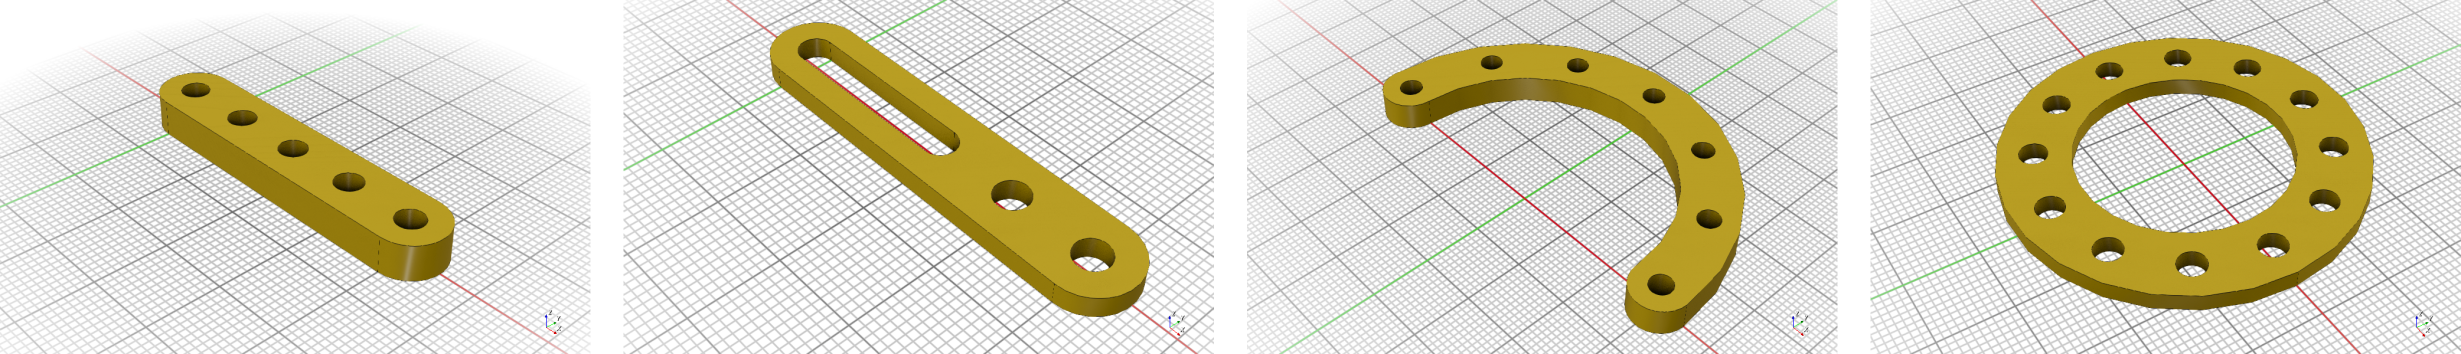

In [2]:
from IPython.display import Image
Image(filename='./img/image_brace.png', width=800)

# <font color='navy'> <i><b> Brace</i></b> </font>

Brace components:

    Brace(size, height, holes, center)
    Brace_Arc(radius, angle, height, holes, center)
    Brace_Circle(radius, height, holes, center)
    Brace_Plate(x,y,height)                         [Todo]


### <font color='teal'> Examples </i></b> </font>

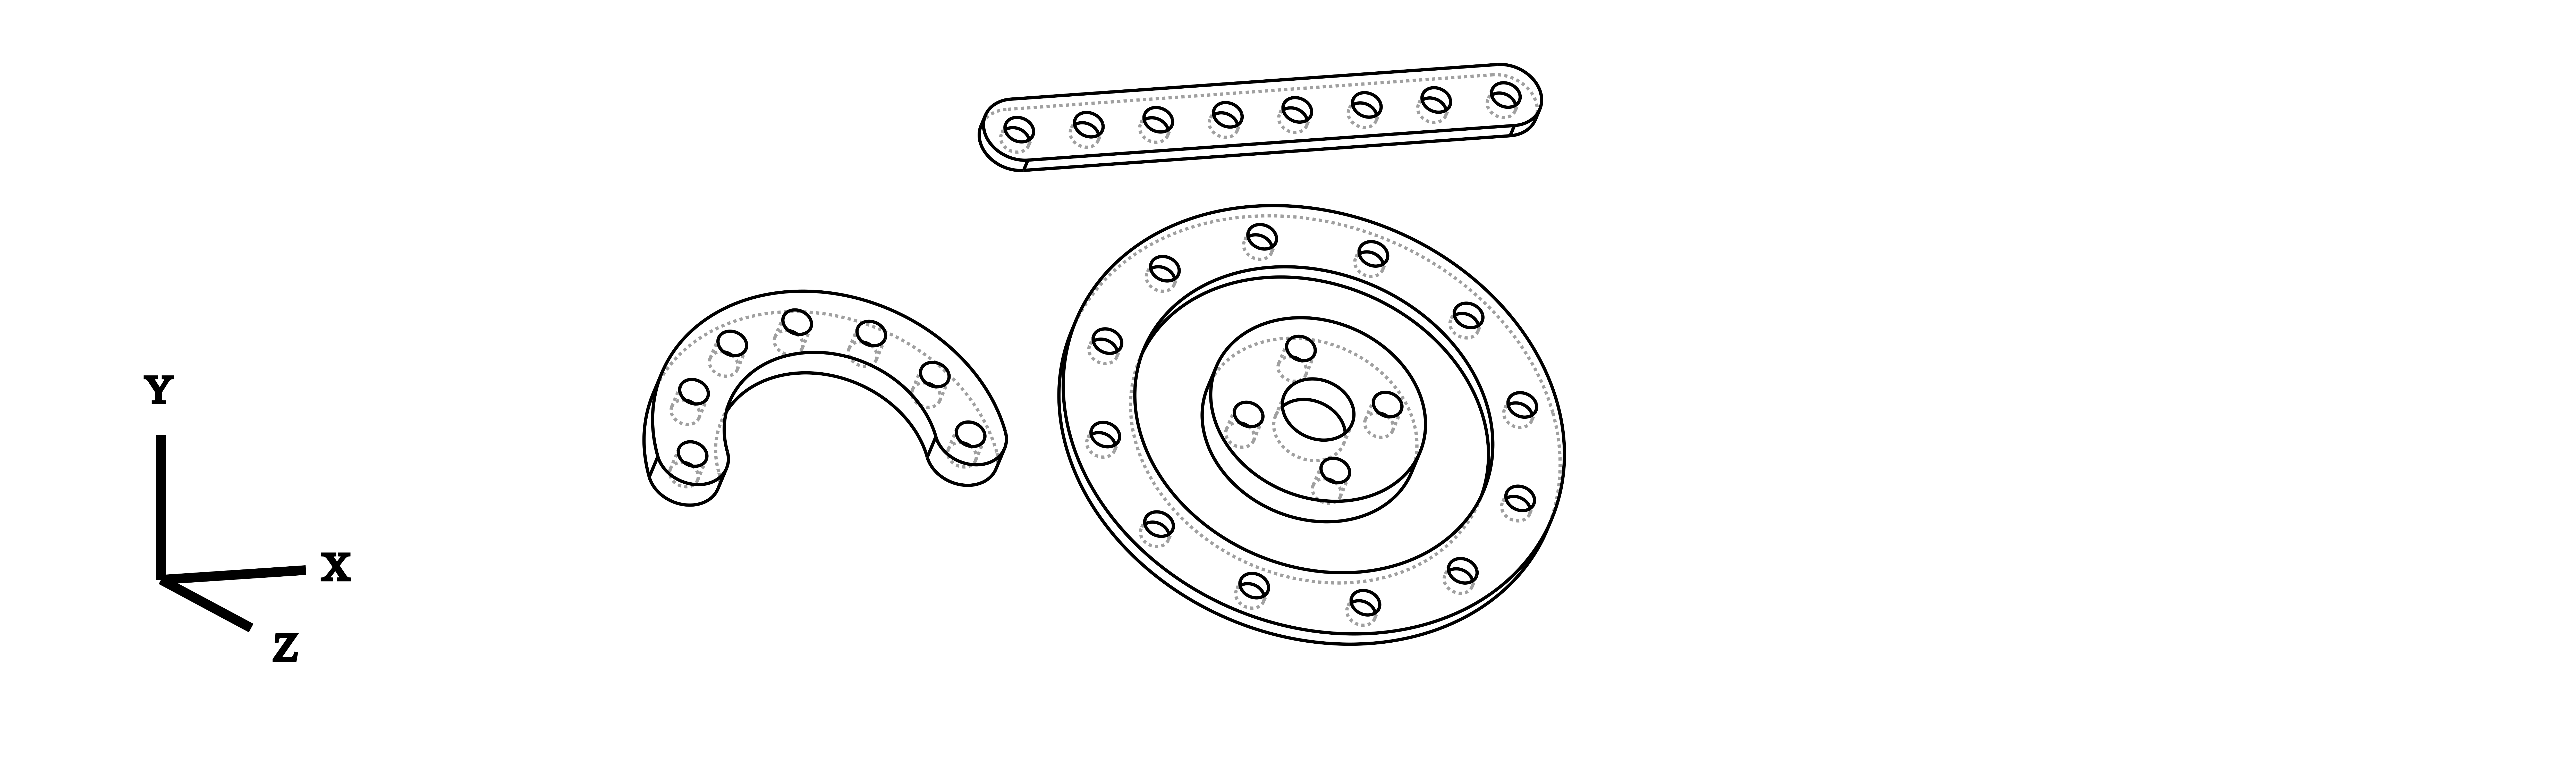

In [7]:
from lib import *

b1 = Brace(8).BU_Ty(4).BU_Txy(-3,1)
b2 = Brace_Circle(1, 1/2, 4)
b3 = Brace_Circle(3, 1/4, 12)
b4 = Brace_Arc(2,180,1/2, 7).BU_Tx(-7)

b1.U([b2,b3,b4]).Rx(-45)


convert_to_image(b1,'./img/block')
Image('./img/block.png', width=800)